# Ujian Praktek Natural Language Processing

Nama : Faiqoh Rohadatul Aisy

Kelas : Fibonacci

Judul : Identifikasi Komentar Instagram Cyberbullying Berdasarkan Sentiment Analysis Menggunakan Algoritma Naive Bayes.



**Latar Belakang dan Tujuan**


Cyberbullying merupakan hal yang saat ini sering sekali terjadi terutama pada fitur komentar sosial media. Tak jarang pengguna sosial media enggan membuka fitur komentar untuk "menghindari" komentar negatif. Bahkan, pada aplikasi instagram sudah terdapat fitur mematikan instagram. Padahal tidak semua komenar tersebut bersifat negatif. Melihat bahaya cyberbullying yang tentu meresahkan banyak orang dikarenakan dampak yang ditimbulkan, maka dari itu dilakukan suatu analisis sentimen pada kolom komentar Instagram yang berupaya untuk mengetahui sentimen dari setiap komentar. Sebagai tambahan. saya ingin melakukan identifikasi komentar positif dan negatif terhadap suatu komentar pada salah satu postingan instagram.

In [572]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [573]:
# Install library Sastrawi
!pip -q install sastrawi

In [574]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##01 Data Acquisition

Dataset yang digunakan diambil dari akun github bernama rizalespe. Spesifikasi dari data tersebut dapat dilihat sebagai berikut :    

1. Dikumpulkan dari posingan pada instagram
2. Dilabeli secara manual oleh pemilik dataset dengan label positif dan negatif
3. Jumlah total dataset adalah 400 komentar
4. Pembagian masing masing kelas label selumlah 200 komentar positif dan negatif. 




## Load dataset

In [575]:
#download dataset
data = pd.read_csv('https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv')

In [576]:
data.head(400)

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...


In [577]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      400 non-null    int64 
 1   Sentiment               400 non-null    object
 2   Instagram Comment Text  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [578]:
print('Total Jumlah Komentar:', data.shape[0], 'data\n')
print('terdiri dari (Sentiment):')
print('-- [0] Positive:', data[data.Sentiment == 'positive'].shape[0], 'data')
print('-- [1] Negative\t:', data[data.Sentiment == 'negative'].shape[0], 'data')


Total Jumlah Komentar: 400 data

terdiri dari (Sentiment):
-- [0] Positive: 200 data
-- [1] Negative	: 200 data


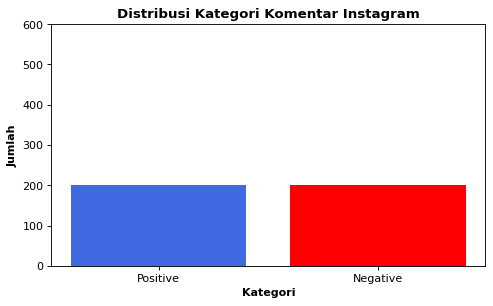

In [579]:
height = data['Sentiment'].value_counts()
sentiment = ('Positive', 'Negative')
y_pos = np.arange(len(sentiment))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Kategori Komentar Instagram', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['royalblue', 'red' ])
plt.xticks(y_pos, sentiment)
plt.show()

## 02 Text Preprocessing

### Casefolding

In [580]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = re.sub(r'username', '', text)              # Menghapus kata username
  text = text.strip()
  return text

In [581]:
raw_sample = data['Instagram Comment Text'].iloc[0] #angka pada iloc menunjukkan data ke berapa yang mau dipakai
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:   <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!
Case folding	:  tolol gak ada hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar


### Word Normalization

In [582]:
# Download corpus kumpulan slangwords
#!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

In [583]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/haris0/SentimentStreamlit/master/key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3721, 3)

In [584]:

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text


In [585]:
'''
def normalization_word(text):
  normal_word_path = pd.read_csv('key_norm.csv')

  text = ' '.join([normal_word_path[normal_word_path['singkat'] == word]['hasil'].values[0]
                   if (normal_word_path['singkat'] == word).any() else word for word in text.split()])
  return text

'''

"\ndef normalization_word(text):\n  normal_word_path = pd.read_csv('key_norm.csv')\n\n  text = ' '.join([normal_word_path[normal_word_path['singkat'] == word]['hasil'].values[0]\n                   if (normal_word_path['singkat'] == word).any() else word for word in text.split()])\n  return text\n\n"

In [586]:
'''
key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head())

key_norm.shape
'''

"\nkey_norm = pd.read_csv('key_norm.csv')\nprint(key_norm.head())\n\nkey_norm.shape\n"

### Filtering (Stopword Removal)

In [587]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [588]:
len(stopwords_ind)

758

In [589]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['username']                    # Tambahkan kata lain dalam daftar stopword

stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_teks = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_teks.append(word)
  return ' '.join(clean_teks)

In [590]:
raw_sample = data['Instagram Comment Text'].iloc[0]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:   <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!
Case folding		:  tolol gak ada hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar
Stopword removal	:  tolol gak hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak hubungan nya woyyyy otak jempol lo gak singkron sih ya nulis komentar


### Stemming

In [591]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [592]:
raw_sample = data['Instagram Comment Text'].iloc[0]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:   <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!
Case folding		:  tolol gak ada hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar
Stopword removal	:  tolol gak hubungan nya keguguran dgn pake hijab syari yg lo bilang bayi nya kepanasan didalem gak hubungan nya woyyyy otak jempol lo gak singkron sih ya nulis komentar
Stemming		:  tolol gak hubung nya gugur dgn pake hijab syar yg lo bilang bayi nya panas dalem gak hubung nya woyyyy otak jempol lo gak singkron sih ya nulis komentar


## Text Preprocessing Pipeline

In [593]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(Text):
  text = casefolding(Text)
  text = text_normalize(Text)
  text = remove_stop_words(Text)
  text = stemming(Text)
  return text

In [594]:
%%time
data['clean_teks'] = data['Instagram Comment Text'].apply(text_preprocessing_process)

CPU times: user 4min 28s, sys: 1.09 s, total: 4min 29s
Wall time: 4min 47s


In [595]:
data

,Id,Sentiment,Instagram Comment Text,clean_teks
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol gak ada hubung nya gugur dgn pa...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tata cowo bgt dibela2in balik hadeww...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",inti kalau kesel dengan att nya gausah ke anak...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lg sakit jiwa knp harus...
...,...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...,bangga sama suami yg selalu ingat istri sela w...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun kerja yg penting halal u tuk nafkah kel...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...,gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...,username asli cantik dan ayu loh mbak krn aku ...


In [596]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
data.to_csv('clean_data.csv')

#  Feature Engineering

In [597]:
# Pisahkan kolom fitur dan target (tugas klasifikasi)
X = data['clean_teks']
y = data['Sentiment']

In [598]:
X

0      username tolol gak ada hubung nya gugur dgn pa...
1      geblek lo tata cowo bgt dibela2in balik hadeww...
2      kmrn termewek2 skr lengket lg duhhh kok labil ...
3      inti kalau kesel dengan att nya gausah ke anak...
4      hadewwwww permpuan itu lg sakit jiwa knp harus...
                             ...                        
395    bangga sama suami yg selalu ingat istri sela w...
396    apaoun kerja yg penting halal u tuk nafkah kel...
397    gojek itu mayoritas pegangguran yang lama gak ...
398    username asli cantik dan ayu loh mbak krn aku ...
399    username suami saya umur sama saya mba malah t...
Name: clean_teks, Length: 400, dtype: object

In [599]:
y

0      negative
1      negative
2      negative
3      negative
4      negative
         ...   
395    positive
396    positive
397    positive
398    positive
399    positive
Name: Sentiment, Length: 400, dtype: object

## Feature Extraction (TF-IDF & N-Gram)
Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [600]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [601]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

2715


In [602]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['10' '15' '16' ... 'zholimi' 'zina' 'zzzzz']


In [603]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [604]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,10,15,16,17,1996,20an,25,30,70,aamiin,...,yoo,you,youtube,yra,yuk,yutub,zaman,zholimi,zina,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [605]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

##Feature Selection 
menggunakan chi square

In [606]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [607]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 2715
Reduced feature number: 1000


In [608]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.221904
1,0.161617
2,0.161617
3,0.107745
4,0.315427
...,...
2710,0.170171
2711,0.153078
2712,0.195338
2713,0.333158


In [609]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.221904,10
1,0.161617,15
2,0.161617,16
3,0.107745,17
4,0.315427,1996
...,...,...
2710,0.170171,yutub
2711,0.153078,zaman
2712,0.195338,zholimi
2713,0.333158,zina


In [610]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
486,6.627223e+00,cantik
1612,4.450699e+00,moga
2235,3.840768e+00,selalu
1241,3.833428e+00,keren
1156,3.807103e+00,kampung
...,...,...
494,1.757759e-05,cari
14,1.046936e-05,abege
1175,5.469639e-06,kata2
1629,1.209572e-06,msh


In [611]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False,  True, False])

In [612]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['1996',
 'aamiin',
 'abal',
 'abbey',
 'abiiis',
 'acha',
 'adat',
 'admin',
 'after',
 'agar',
 'agnes',
 'agus',
 'ah',
 'ahahahhaha',
 'aj',
 'aja',
 'ajaaa',
 'ak',
 'akhir',
 'akhlak',
 'akun',
 'akuuu',
 'alam',
 'alami',
 'alay',
 'alesha',
 'alhamdulillah',
 'allah',
 'am',
 'amat',
 'amazing',
 'amel',
 'amiiii',
 'amiin',
 'amin',
 'amit',
 'amora',
 'ampe',
 'ampuuun',
 'anak2',
 'anang',
 'ancur',
 'anda',
 'aneh',
 'angguunn',
 'ani',
 'anjing',
 'anjir',
 'anjirrrr',
 'antem',
 'anti',
 'anyiennnnggg',
 'apa',
 'apain',
 'apaoun',
 'api',
 'apik',
 'aplg',
 'ariel',
 'artis',
 'ashanti',
 'asik',
 'asli',
 'ato',
 'att',
 'audisi',
 'aurel',
 'aw2',
 'awat',
 'awet',
 'ayah',
 'ayu',
 'ayuu',
 'az',
 'azriel',
 'babang',
 'babi',
 'babiii',
 'baca',
 'bacot',
 'badaaiik',
 'baguass',
 'bagus',
 'bagusss',
 'bagussss',
 'bahagia',
 'bahkan',
 'baik',
 'baik2',
 'bain',
 'bak',
 'bakal',
 'bakat',
 'bala',
 'balajaer',
 'banci',
 'bang',
 'bangeeet',
 'bangeg',
 'banget',


In [613]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [614]:
kbest_feature

{'username': 2609,
 'tolol': 2535,
 'gak': 794,
 'nya': 1828,
 'pake': 1895,
 'hijab': 958,
 'lo': 1424,
 'bilang': 371,
 'panas': 1903,
 'otak': 1881,
 'sih': 2309,
 'ya': 2677,
 'komentar': 1305,
 'bgt': 350,
 'tuh': 2553,
 'kok': 1301,
 'mbak': 1533,
 'ato': 168,
 'sensasi': 2261,
 'biar': 358,
 'dengan': 617,
 'att': 169,
 'ke': 1191,
 'kasi': 1170,
 'orang': 1870,
 'bener': 320,
 'anda': 109,
 'dia': 637,
 'yang': 2689,
 'boleh': 412,
 'tau': 2466,
 'nama': 1684,
 'manusia': 1497,
 'semua': 2255,
 'suka': 2406,
 'pasti': 1924,
 'haters': 931,
 'permpuan': 1974,
 'jiwa': 1103,
 'knp': 1295,
 'di': 636,
 'artis': 149,
 'pantesan': 1912,
 'tinggalin': 2522,
 'laki': 1363,
 'mikir': 1571,
 'perempuan': 1965,
 'ngurus': 1782,
 'aja': 47,
 'becus': 286,
 'mending': 1548,
 'balajaer': 225,
 'ig': 990,
 'para': 1918,
 'apa': 132,
 'dan': 582,
 'asik': 158,
 'tar': 2461,
 'lama2': 1372,
 'lagu': 1356,
 'ketika': 1256,
 'laknat': 1368,
 'ngamuk': 1726,
 'iya': 1039,
 'banget': 237,
 'goda':

In [615]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,1996,aamiin,abal,abbey,abiiis,acha,adat,admin,after,agar,...,yatuhan,yeee,yes,yesss,yesssssss,yng,you,youtube,yra,zina
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [616]:
with open('kbest_feature.pickle', 'wb') as output:
    pickle.dump(kbest_feature, output)

#04 Modelling (Machine Learning)

Model yang digunakan adalah Machine Learning Algoritma Naive Bayes. Naive Bayes adalah metode yang cocok untuk klasifikasi biner dan multiclass. Metode yang juga dikenal sebagai Naive Bayes Classifier ini menerapkan teknik supervised klasifikasi objek di masa depan. Tujuan metode ini adalah mengklasifikasikan probabilitas berdasarkan pembelajaran mesin atas probabilitas lain.

Beberapa keunggulan dari metode ini diantaranya :      
1. sederhana dan mudah diterapkan,
2. tidak membutuhkan banyak data pelatihan, 
3. menangani data kontinu dan diskrit, 
4. sangat skalabel dengan jumlah prediktor dan titik data, 
5. serta cepat dan dapat digunakan untuk membuat prediksi realtime.

Metode ini dipilih karena dapat mengklasifikasikan suatu dataset sekaligus memprediksi kelas untuk input baru.

Dataset yang digunakan juga hanya terdiri dari 400 data dan tidak terlalu banyak, sehingga metode ini dapat dikatakan sebagai metode yang paling sesuai.

In [617]:
'''
Supervised learning in Sklearn
https://scikit-learn.org/stable/supervised_learning.html
'''
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma supervised learning. Contoh ini menggunakan algoritma Naive Bayes
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih
from sklearn.linear_model import LogisticRegression


In [618]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
!wget https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=10)

--2022-10-06 11:05:22--  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
Resolving scikit-learn.org (scikit-learn.org)... 185.199.109.153, 185.199.111.153, 185.199.108.153, ...
Connecting to scikit-learn.org (scikit-learn.org)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61079 (60K) [text/html]
Saving to: ‘sklearn.model_selection.train_test_split.html.8’

sklearn.model_selec 100%[===================>]  59.65K  --.-KB/s    in 0.01s   

2022-10-06 11:05:22 (5.20 MB/s) - ‘sklearn.model_selection.train_test_split.html.8’ saved [61079/61079]



In [619]:
# Training the model
algorithm = LogisticRegression()
#algorithm = MultinomialNB()               # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [620]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array(['positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negati

In [621]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array(['positive', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negati

# 05 Model Evaluation

In [622]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 73
Jumlah prediksi salah	: 7
Akurasi pengujian	: 91.25 %


In [623]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[37  4]
 [ 3 36]]


In [624]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

    negative       0.93      0.90      0.91        41
    positive       0.90      0.92      0.91        39

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



In [625]:
# Cross Validation

from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.8625 0.95   0.9125 0.9375 0.8875 0.9375 0.9125 0.8625 0.925  0.9375] 

Rata-rata akurasi pada cross validation: 0.9125


#06 Simple Deployment

In [633]:
from joblib import load

# load model
model = load('model_1.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

##Memasukkan contoh komentar instagram 👇👇🏻👇🏼

In [634]:

input_text = input("Masukkan Komentar: ")

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('\nHasil Text Preprocessing :', pre_input_text)

if (result=='positive'):
  komentar = 'Komentar Positif'
else:
  komentar = 'Komentar Negatif'


print('\nHasil prediksi mengatakan bahwa "', input_text, '" termasuk ', komentar)

Masukkan Komentar: kamu jelek

Hasil Text Preprocessing : kamu jelek

Hasil prediksi mengatakan bahwa " kamu jelek " termasuk  Komentar Negatif


# 07 WordCloud

In [628]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [629]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-10-06 11:12:30--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg.7’

cloud.jpg.7         100%[===================>]  33.59K  --.-KB/s    in 0.002s  

2022-10-06 11:12:30 (14.0 MB/s) - ‘cloud.jpg.7’ saved [34396/34396]



In [630]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

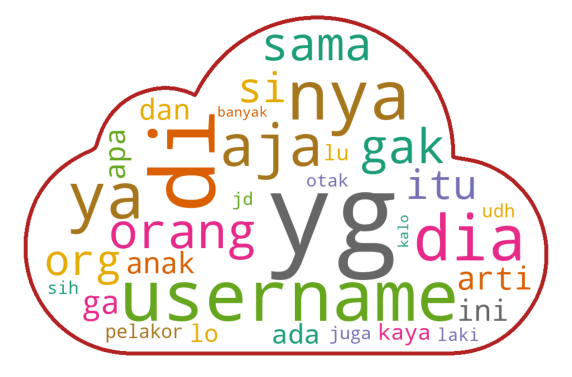

In [631]:
# WordCloud Label komentar negatif

komentar_negatif = data[data.Sentiment == 'negative']
negatif_string = []

for t in komentar_negatif.clean_teks:
  negatif_string.append(t)

negatif_string = pd.Series(negatif_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(negatif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

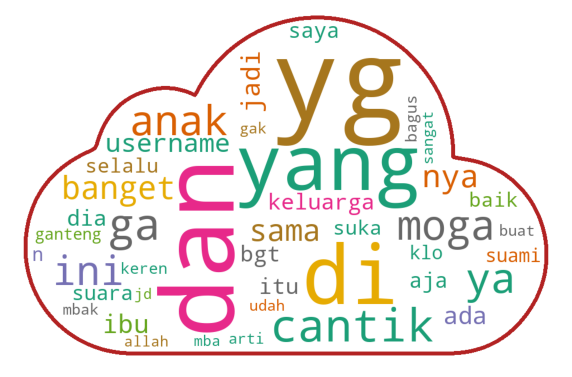

In [632]:
# WordCloud Label Komentar Positif

komentar_positif = data[data.Sentiment == 'positive']
positif_string = []

for t in komentar_positif.clean_teks:
  positif_string.append(t)

positif_string = pd.Series(positif_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(positif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Kesimpulan**

Dari pengujian di atas didapatkan hasil akurasi tertinggi sebesar 91,25% pada komposisi 80% untuk data latih dan 20% untuk data uji.
Selain itu, didapat wordcloud di atas untuk menampilkan kata yang paling sering muncul di kedua sentiment.